<a href="https://colab.research.google.com/github/scalixte-mdsol/ucsd_extension/blob/main/DeepLearningForComputerVisionAssignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Implement your first Neural Network of your choice on Google Colab and use Google products, Keras and TensorFlow.
### Assignment #1

## Title: Classification of Birds images using CNN

## Author: Stanley Calixte

## Objectives: Birds species classification using Convolutional Neural Network

>Note:
Using kaggle to download test and training data of bird species. This implementation is creating multiple hidden layers with CNN and Relu activation to classify the bird species.

In [ ]:
# The setup
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
# Loading keras
import keras
from keras import layers
from keras import Sequential
from keras.layers import Input, Dense,Conv2D , MaxPooling2D, Flatten,BatchNormalization,Dropout

In [ ]:
# Loading Tensorflow Learn
import tensorflow as t
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Activation
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
import kagglehub


In [ ]:
# Download latest version
path = kagglehub.dataset_download("akash2907/bird-species-classification")

print("Path to dataset files:", path)

100%|██████████| 1.37G/1.37G [00:11<00:00, 126MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/akash2907/bird-species-classification/versions/1


In [ ]:
# The following creates directory path for test and training directories

# Training director
train_dir = "{path}/{dir}".format(path=path, dir='train_data/train_data')
print(train_dir)
print(os.path.exists(train_dir))

# Testing director
test_dir = "{path}/{dir}".format(path=path, dir='test_data/test_data')
print(test_dir)
print(os.path.exists(test_dir))

/root/.cache/kagglehub/datasets/akash2907/bird-species-classification/versions/1/train_data/train_data
True
/root/.cache/kagglehub/datasets/akash2907/bird-species-classification/versions/1/test_data/test_data
True


In [ ]:
# The following generates the test and training data for images
# This code was obtained from kaggle.
# See reference in https://www.kaggle.com/code/sandipshresthad/bird-classification
train_datagen = ImageDataGenerator(
    rescale = 1. /255,
    zoom_range = 0.2,
    horizontal_flip = True,
    validation_split= 0.2

)

test_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                   target_size =(150,150),
                                                   batch_size=32,
                                                   class_mode='categorical',
                                                   subset='training')

validation_generator = train_datagen.flow_from_directory(train_dir,
                                                   target_size =(150,150),
                                                   batch_size=32,
                                                   class_mode='categorical',
                                                   subset='validation')
test_generator = test_datagen.flow_from_directory(test_dir,
                                                   target_size =(150,150),
                                                   batch_size=32,
                                                   class_mode='categorical',
                                                   )


Found 124 images belonging to 16 classes.
Found 26 images belonging to 16 classes.
Found 157 images belonging to 16 classes.


In [ ]:
# Creating the model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3), use_bias=False),
    MaxPooling2D((2, 2)),

    Conv2D(64, (3, 3), activation='relu', use_bias=False),
    MaxPooling2D((2, 2)),

    Conv2D(128, (3, 3), activation='relu', use_bias=False),
    MaxPooling2D((2, 2)),

    Conv2D(128, (3, 3), activation='relu', use_bias=False),
    MaxPooling2D((2, 2)),

    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(16, activation='softmax')
])

In [ ]:
# Compiling the model
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
# Creating a model fit
fitting = model.fit(train_generator,
                    steps_per_epoch=train_generator.samples // train_generator.batch_size,
                    validation_data=validation_generator,
                    validation_steps=validation_generator.samples // validation_generator.batch_size,
                    epochs=20
                   )

Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 28s 10s/step - accuracy: 0.0451 - loss: 10.1529 - val_accuracy: 0.1538 - val_loss: 6.0106
Epoch 2/20
1/3 ━━━━━━━━━━━━━━━━━━━━ 2s 1s/step - accuracy: 0.1250 - loss: 8.1693

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 2s/step - accuracy: 0.1250 - loss: 8.1693 - val_accuracy: 0.1538 - val_loss: 6.9498
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 27s 11s/step - accuracy: 0.1328 - loss: 7.6385 - val_accuracy: 0.1538 - val_loss: 7.4489
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 2s/step - accuracy: 0.1786 - loss: 7.7565 - val_accuracy: 0.0769 - val_loss: 7.4524
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 23s 8s/step - accuracy: 0.0943 - loss: 7.9990 - val_accuracy: 0.1154 - val_loss: 7.4721
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 2s/step - accuracy: 0.2188 - loss: 5.6555 - val_accuracy: 0.1154 - val_loss: 7.4768
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 23s 8s/step - accuracy: 0.0586 - loss: 7.1136 - val_accuracy: 0.1154 - val_loss: 6.5960
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 2s/step - accuracy: 0.1071 - loss: 8.1720 - val_accuracy: 0.1154 - val_loss: 6.5465
Epoch 9/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 22s 7s/step - accuracy: 0.0638 - loss: 6.8413 - val_accuracy: 0.0385 - val_loss: 6.4843
Epoch 10/20
3/3 ━━━━━━

In [ ]:
# Evaluate loss and accuracy from the model
loss, accuracy = model.evaluate(test_generator)

5/5 ━━━━━━━━━━━━━━━━━━━━ 30s 6s/step - accuracy: 0.1063 - loss: 5.1474


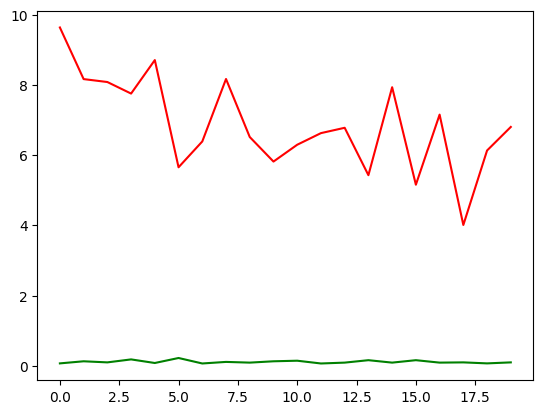

In [ ]:
# Plot loss and accuracy
plt.plot(fitting.history['loss'],color = 'red')
plt.plot(fitting.history['accuracy'],color = 'green')